# **Zadatak 1**

a) Učitati The Boston Housing Price skup podataka. Skup podataka je dio Keras biblioteke te se može učitati
sljedećim kodom:

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


b) Koji je oblik podataka za treniranje, a koji za testiranje? Koliko ima ukupno atributa (značajki)?



In [3]:
print("Oblik podataka za treniranje: ",train_data.shape)
print("Oblik podataka za testiranje: ",test_data.shape)
print("Ukupno atributa (znacajki) ima: ", train_data.shape[1])

Oblik podataka za treniranje:  (404, 13)
Oblik podataka za testiranje:  (102, 13)
Ukupno atributa (znacajki) ima:  13


c) Koji je opseg vrijednosti (min i max) za svaki atribut u skupu podataka? A koji je opseg vrijednosti za ciljne
(eng. target) vrijednosti?

In [16]:
import pandas as pd
data_frame_train=pd.DataFrame(train_data)
data_frame_test=pd.DataFrame(test_data)
data_frame_targets_train=pd.DataFrame(train_targets)
data_frame_targets_test=pd.DataFrame(test_targets)
data_frame=pd.concat([data_frame_train, data_frame_test,], axis=0)
data_frame_targets=pd.concat([data_frame_targets_train, data_frame_targets_test,], axis=0)
data_frame.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
data_frame_targets.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


d) S obzirom da podaci zauzimaju široke spektre vrijednosti, izvršiti skaliranje korištenjem MinMaxScaler-a.
Obavezno povesti računa da se parametri scaler-a za skaliranje izračunaju nad trening skupom podataka, a
da se skaliranje izvrši i nad trening i nad test skupom;

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_data)
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

e) Napisati pomoćnu funkciju def model_mreze() koja će vraćati model mreže (return model) opisan u
nastavku. Model treba da ima 2 skrivena Dense sloja sa po 64 neurona sa relu aktivacijskim funkcijama.
Dimenzije ulaznog sloja odrediti na osnovu broja atributa skupa podataka. Treći, koji je i posljednji sloj, treba
imati samo jedan neuron i ne treba imati aktivacijsku funkciju;

In [18]:
from keras import models
from keras import layers

def model_mreze():
  n = train_data.shape[1]
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(n,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  return model

f) Kompajlirati model da koristi mse funkciju gubitka, adam optimizator i mae metriku. S obzirom da su ciljne
vijednosti izražene u hiljadama dolara, metrika MAE govori koliko model griješi u hiljadama dolara. Na primjer,
ukoliko je vrijednost MAE = 4.2, to znači da predviđanja modela odstupaju u prosjeku za $4200;

In [40]:
model=model_mreze()
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

g) Izvršiti treniranje modela na 100 epoha, sa veličinom batch-a jednakoj 1. Koristiti 10% trening skupa za
validaciju. Kolika je postignuta vrijednost funkcije gubitka na kraju treniranja, a kolika je vrijednost metrike
MAE? Grafički prikazati;

In [41]:
history = model.fit(train_data, train_targets, epochs=100, batch_size=1, validation_split=0.1)

Epoch 1/100
363/363 [==============================] - 2s 2ms/step - loss: 210.5889 - mae: 10.6744 - val_loss: 50.9523 - val_mae: 5.8518
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 59.0002 - mae: 5.4116 - val_loss: 20.5141 - val_mae: 3.5367
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 38.1974 - mae: 4.3266 - val_loss: 25.3404 - val_mae: 3.9381
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 30.2268 - mae: 3.9033 - val_loss: 27.4498 - val_mae: 4.2075
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 25.6217 - mae: 3.6143 - val_loss: 23.6318 - val_mae: 3.5768
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 23.0410 - mae: 3.4427 - val_loss: 22.2922 - val_mae: 3.5358
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 21.0513 - mae: 3.2173 - val_loss: 21.7532 - val_mae: 3.4018
Epoch 8/100
363/363 [==============================] 

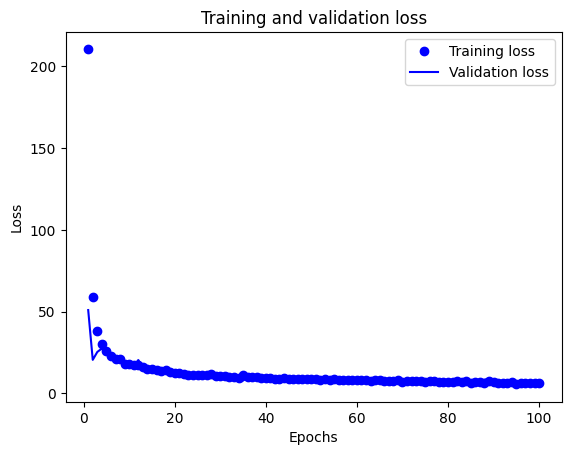

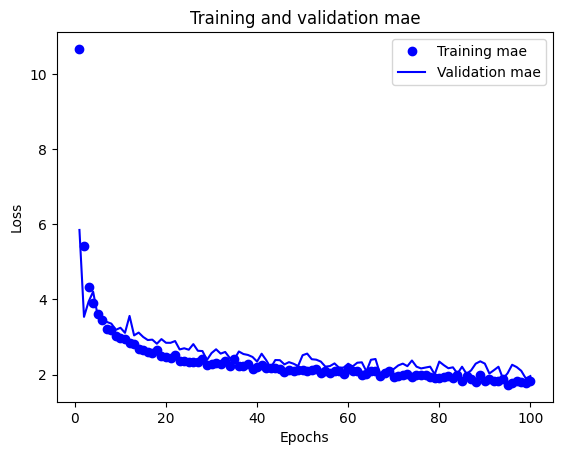

In [42]:
import math
import matplotlib.pyplot as plt

acc = history.history['mae']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history.history['mae']
val_acc_values = history.history['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

h) U prethodnom grafičkom prikazu problem predstavlja skala i visoka varijansa nad validacijskim skupom podataka. Iz tog razloga je korisno prikazati usrednjene vrijednosti i zanemariti prvih 10 uzoraka radi visoke skale u početnim epohama. Ovakav prikaz nad validacijskim skupom podataka se može postići sljedećim kodom:

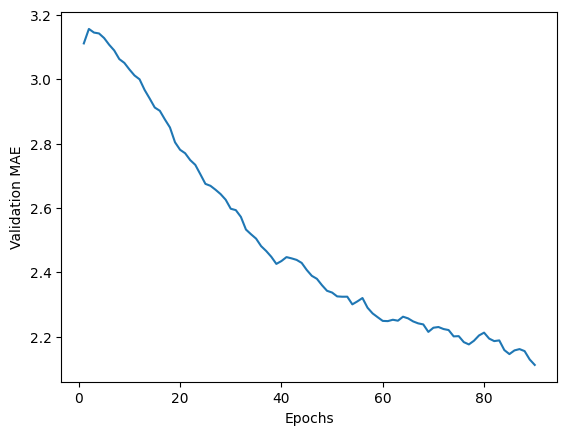

In [43]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
       previous = smoothed_points[-1]
       smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
  return smoothed_points
mae_history = history.history['val_mae']

smooth_mae_history = smooth_curve(mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

i) Ponovo definisati model i istrenirati ga na 500 epoha. Ostale parametre ostaviti nepromijenjenim. Izvršiti
grafički prikaz usrednjenih vrijednosti kao u prethodnom zadatku. Uporediti ova dva grafička prikaza. Šta se
može zaključiti iz ovih grafika?

In [23]:
model=model_mreze()
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [24]:
history = model.fit(train_data, train_targets, epochs=500, batch_size=1, validation_split=0.1)

Epoch 1/500
363/363 [==============================] - 2s 2ms/step - loss: 196.7092 - mae: 10.2836 - val_loss: 36.1238 - val_mae: 4.9626
Epoch 2/500
363/363 [==============================] - 1s 2ms/step - loss: 53.3874 - mae: 5.0269 - val_loss: 22.0582 - val_mae: 3.5314
Epoch 3/500
363/363 [==============================] - 1s 2ms/step - loss: 38.7825 - mae: 4.3705 - val_loss: 21.3760 - val_mae: 3.5446
Epoch 4/500
363/363 [==============================] - 1s 2ms/step - loss: 30.6478 - mae: 3.9214 - val_loss: 20.3539 - val_mae: 3.3955
Epoch 5/500
363/363 [==============================] - 1s 2ms/step - loss: 25.8846 - mae: 3.6213 - val_loss: 22.4715 - val_mae: 3.5113
Epoch 6/500
363/363 [==============================] - 1s 2ms/step - loss: 22.8434 - mae: 3.4124 - val_loss: 19.5410 - val_mae: 3.2449
Epoch 7/500
363/363 [==============================] - 1s 2ms/step - loss: 20.6159 - mae: 3.2305 - val_loss: 24.1256 - val_mae: 3.9305
Epoch 8/500
363/363 [==============================] 

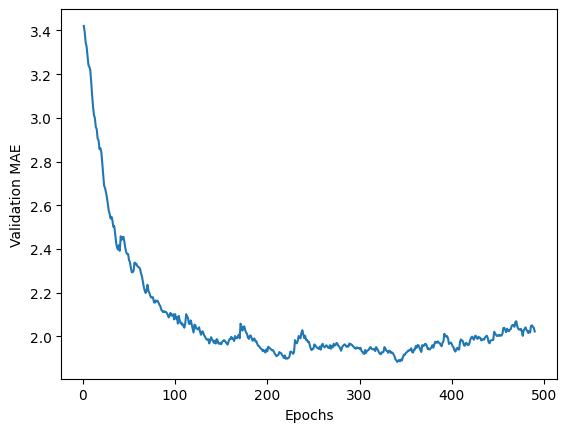

In [25]:
mae_history = history.history['val_mae']

smooth_mae_history = smooth_curve(mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

j)

In [26]:
results = model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 37.6179 - mae: 5.3984
